# Orphanet

In [2]:
from pathlib import Path
import pandas as pd
import sys
from collections import OrderedDict
import xml.etree.ElementTree as ET
from matplotlib import pyplot
from upsetplot import from_contents, from_memberships
from upsetplot import plot as plot_upset
sys.path.insert(0, '../') # add config to path


In [4]:
ORPHANET_FLAT_PATH = config.ORPHANET_PATH / 'intermediate_files'
ORPHANET_RAW_PATH = config.ORPHANET_PATH / 'raw_files_2019_10'

## Phenotypes

In [618]:
tree = ET.parse(str(ORPHANET_RAW_PATH / 'phenotypes_rare_disorders_en_product4_HPO.xml'))
root = tree.getroot()
disorderlist_phenos = root[1]

In [619]:

hpo_list = []
for disorder in disorderlist_phenos:
    disorder_orphan = disorder.find("OrphaNumber").text
    disorder_name = disorder.find("Name").text
    for child in disorder.find("HPODisorderAssociationList"):
        child_hpo = child.find("HPO")
        hpo_id = child_hpo.find("HPOId").text
        hpo_string = child_hpo.find("HPOTerm").text
        hpo_freq = child.find("HPOFrequency").find("Name").text
        hpo_list.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name),
            ("HPO_ID", hpo_id),
            ("HPO_String", hpo_string),
            ("HPO_Freq", hpo_freq)]))
disease_hpo_df = pd.DataFrame(hpo_list)
disease_hpo_df.head(10)

,OrphaNumber,Disorder_Name,HPO_ID,HPO_String,HPO_Freq
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000256,Macrocephaly,Very frequent (99-80%)
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000272,Malar flattening,Very frequent (99-80%)
2,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000316,Hypertelorism,Very frequent (99-80%)
3,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000369,Low-set ears,Very frequent (99-80%)
4,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000470,Short neck,Very frequent (99-80%)
5,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0000767,Pectus excavatum,Very frequent (99-80%)
6,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0001274,Agenesis of corpus callosum,Frequent (79-30%)
7,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0001373,Joint dislocation,Very frequent (99-80%)
8,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0001513,Obesity,Frequent (79-30%)
9,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",HP:0002007,Frontal bossing,Very frequent (99-80%)


In [620]:
(disease_hpo_df.groupby("Disorder_Name").count().OrphaNumber.mean(),
 disease_hpo_df.groupby("HPO_ID").count().OrphaNumber.mean())

(22.57293354943274, 12.545413601561327)

In [621]:
disease_hpo_df.HPO_Freq.value_counts()

Frequent (79-30%)         28349
Occasional (29-5%)        25978
Very frequent (99-80%)    25653
Very rare (<4-1%)          2600
Obligate (100%)             538
Excluded (0%)               447
Name: HPO_Freq, dtype: int64

In [622]:
print("Unique diseases w/ HPOS: ", len(set(disease_hpo_df.OrphaNumber)))

Unique diseases w/ HPOS:  3702


## Genes

In [623]:
tree = ET.parse(str(ORPHANET_RAW_PATH / 'genes_rare_diseases_en_product6.xml'))
root = tree.getroot()
disorderlist_genes = root[1]

In [624]:
gene_list = []
for disorder in disorderlist_genes:
    disorder_orphan = disorder.find("OrphaNumber").text
    disorder_name = disorder.find("Name").text
    for child in disorder.find("DisorderGeneAssociationList"):
        child_gene = child.find("Gene")
        gene_symbol = child_gene.find("Symbol").text
        gene_synonyms = "|".join([x.text
                                  for x in child_gene.find("SynonymList")])
        external_refs = "|".join([":".join([x.find("Source").text, x.find("Reference").text])
                                  for x in child_gene.find("ExternalReferenceList")])
        association_type = child.find("DisorderGeneAssociationType").find("Name").text
        association_status = child.find("DisorderGeneAssociationStatus").find("Name").text
        gene_list.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name),
            ("Gene_Symbol", gene_symbol),
            ("Association_Type", association_type),
            ("Association_Status", association_status),
            ("Gene_Synonyms", gene_synonyms),
            ("Gene_External_Refs", external_refs)
        ]))
disorder_gene_df = pd.DataFrame(gene_list)
print(disorder_gene_df.shape)
disorder_gene_df.head(10)

(7552, 7)


,OrphaNumber,Disorder_Name,Gene_Symbol,Association_Type,Association_Status,Gene_Synonyms,Gene_External_Refs
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",KIF7,Disease-causing germline mutation(s) in,Assessed,JBTS12,Ensembl:ENSG00000166813|Genatlas:KIF7|HGNC:304...
1,93,Aspartylglucosaminuria,AGA,Disease-causing germline mutation(s) in,Assessed,ASRG|N(4)-(beta-N-acetylglucosaminyl)-L-aspara...,Reactome:P20933|Ensembl:ENSG00000038002|Genatl...
2,166035,Brachydactyly-short stature-retinitis pigmento...,CWC27,Disease-causing germline mutation(s) in,Assessed,NY-CO-10|SDCCAG-10,
3,585,Multiple sulfatase deficiency,SUMF1,Disease-causing germline mutation(s) in,Assessed,FGE|UNQ3037,Ensembl:ENSG00000144455|Genatlas:SUMF1|HGNC:20...
4,118,Beta-mannosidosis,MANBA,Disease-causing germline mutation(s) in,Assessed,beta-mannosidase A,Reactome:O00462|Genatlas:MANBA|HGNC:6831|OMIM:...
5,166068,Pontocerebellar hypoplasia type 5,TSEN54,Disease-causing germline mutation(s) in,Assessed,SEN54|SEN54L,Ensembl:ENSG00000182173|Genatlas:TSEN54|HGNC:2...
6,166063,Pontocerebellar hypoplasia type 4,TSEN54,Disease-causing germline mutation(s) in,Assessed,SEN54|SEN54L,Ensembl:ENSG00000182173|Genatlas:TSEN54|HGNC:2...
7,166078,Von Willebrand disease type 1,VWF,Disease-causing germline mutation(s) in,Assessed,,Ensembl:ENSG00000110799|Genatlas:VWF|HGNC:1272...
8,166073,Pontocerebellar hypoplasia type 6,RARS2,Disease-causing germline mutation(s) in,Assessed,DALRD2|MGC14993|MGC23778|PRO1992|arginine tRNA...,Ensembl:ENSG00000146282|Genatlas:RARS2|HGNC:21...
9,166084,Von Willebrand disease type 2A,VWF,Disease-causing germline mutation(s) in,Assessed,,Ensembl:ENSG00000110799|Genatlas:VWF|HGNC:1272...


In [625]:
print("Unique diseases w/ Genes: ", len(set(disorder_gene_df.OrphaNumber)))

Unique diseases w/ Genes:  3803


In [626]:
(disorder_gene_df.groupby("Disorder_Name").count().OrphaNumber.mean(),
 disorder_gene_df.groupby("Gene_Symbol").count().OrphaNumber.mean())

(1.9858006836707862, 1.8646913580246913)

In [627]:
disorder_gene_df.Association_Type.value_counts()

Disease-causing germline mutation(s) in                       4644
Disease-causing germline mutation(s) (loss of function) in    1107
Major susceptibility factor in                                 497
Candidate gene tested in                                       312
Part of a fusion gene in                                       232
Role in the phenotype of                                       231
Disease-causing germline mutation(s) (gain of function) in     209
Disease-causing somatic mutation(s) in                         183
Biomarker tested in                                             97
Modifying germline mutation in                                  40
Name: Association_Type, dtype: int64

In [628]:
causal_assocation_types = ["Disease-causing germline mutation(s) in",
                           "Disease-causing germline mutation(s) (loss of function) in",
                           "Disease-causing germline mutation(s) (gain of function) in",
                           "Disease-causing somatic mutation(s) in"
                          ]
disorder_gene_df_causal = disorder_gene_df.query("Association_Type in @causal_assocation_types")
disorder_gene_df_causal.Association_Type.value_counts()

Disease-causing germline mutation(s) in                       4644
Disease-causing germline mutation(s) (loss of function) in    1107
Disease-causing germline mutation(s) (gain of function) in     209
Disease-causing somatic mutation(s) in                         183
Name: Association_Type, dtype: int64

In [629]:
(disorder_gene_df_causal.groupby("Disorder_Name").count().OrphaNumber.mean(),
 disorder_gene_df_causal.groupby("Gene_Symbol").count().OrphaNumber.mean())

(1.7988286969253295, 1.6988384955752212)

In [630]:
disorder_gene_df_causal.groupby("Association_Type").Association_Status.value_counts()

Association_Type                                            Association_Status
Disease-causing germline mutation(s) (gain of function) in  Assessed               209
Disease-causing germline mutation(s) (loss of function) in  Assessed              1106
                                                            Not yet assessed         1
Disease-causing germline mutation(s) in                     Assessed              4634
                                                            Not yet assessed        10
Disease-causing somatic mutation(s) in                      Assessed               177
                                                            Not yet assessed         6
Name: Association_Status, dtype: int64

In [631]:
disorder_gene_df_causal = disorder_gene_df_causal.query("Association_Status == 'Assessed'")
disorder_gene_df_causal.groupby("Association_Type").Association_Status.value_counts()

Association_Type                                            Association_Status
Disease-causing germline mutation(s) (gain of function) in  Assessed               209
Disease-causing germline mutation(s) (loss of function) in  Assessed              1106
Disease-causing germline mutation(s) in                     Assessed              4634
Disease-causing somatic mutation(s) in                      Assessed               177
Name: Association_Status, dtype: int64

In [632]:
print("Unique diseases w/ Causal Genes: ", len(set(disorder_gene_df_causal.OrphaNumber)))

Unique diseases w/ Causal Genes:  3410


## Natural History Files

In [5]:
tree = ET.parse(str(ORPHANET_RAW_PATH / 'natural_history_en_product9_ages.xml'))
root = tree.getroot()
disorderlist_nat_hist = root[1]

Unique age entries:
['Adolescent',
 'Adult',
 'All ages',
 'Antenatal',
 'Childhood',
 'Elderly',
 'Infancy',
 'Neonatal']
 }

In [6]:

nat_hist_list = []
debug_disorder = None
for disorder in disorderlist_nat_hist:
    disorder_orphan = disorder.find("OrphaNumber").text
    disorder_name = disorder.find("Name").text
    disorder_type = disorder.find("DisorderType").find("Name").text
    average_age_onset = "|".join([x.find("Name").text
                                  for x in disorder.find("AverageAgeOfOnsetList")]) 
    
    onset_neonatal = ('All ages' in average_age_onset) or \
                    ('Antenatal' in average_age_onset) or ('Neonatal' in average_age_onset)
    onset_infant = ('All ages' in average_age_onset) or ('Infancy' in average_age_onset)
    onset_child = ('All ages' in average_age_onset) or ('Childhood' in average_age_onset)
    onset_adolescent = ('All ages' in average_age_onset) or ('Adolescent' in average_age_onset)
    onset_adult = ('All ages' in average_age_onset) or ('Adult' in average_age_onset)
    onset_elderly = ('All ages' in average_age_onset) or ('Elderly' in average_age_onset)
    
    average_age_death = "|".join([x.find("Name").text
                                  for x in disorder.find("AverageAgeOfDeathList")])
    inheritence_types = "|".join([x.find("Name").text
                                  for x in disorder.find("TypeOfInheritanceList")])
    nat_hist_list.append(OrderedDict([
        ("OrphaNumber", disorder_orphan),
        ("Disorder_Name", disorder_name),
        ("Onset_Infant", onset_infant),
        ("Onset_Child", onset_child),
        ("Onset_Adolescent", onset_adolescent),
        ("Onset_Adult", onset_adult),
        ("Onset_Elderly", onset_elderly),
        ("Disorder_Type", disorder_type),
        ("Average_Age_Onset", average_age_onset),
        ("Average_Age_Death", average_age_death),
        ("Inheritence_Types", inheritence_types)
        ]))
nat_hist_df = pd.DataFrame(nat_hist_list)
nat_hist_df.head(5)

,OrphaNumber,Disorder_Name,Onset_Infant,Onset_Child,Onset_Adolescent,Onset_Adult,Onset_Elderly,Disorder_Type,Average_Age_Onset,Average_Age_Death,Inheritence_Types
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",True,False,False,False,False,Disease,Infancy|Neonatal,,Autosomal recessive
1,58,Alexander disease,True,True,True,True,True,Disease,All ages,any age,Autosomal dominant
2,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",True,True,False,False,False,Disease,Childhood|Infancy,No data available,
3,61,Alpha-mannosidosis,True,True,False,False,False,Disease,Childhood|Infancy|Neonatal,any age,Autosomal recessive
4,166029,"Multiple epiphyseal dysplasia, with severe pro...",False,True,False,False,False,Disease,Childhood,No data available,


In [8]:
nat_hist_df.loc[nat_hist_df['Disorder_Type'] == 'Category']

,OrphaNumber,Disorder_Name,Onset_Infant,Onset_Child,Onset_Adolescent,Onset_Adult,Onset_Elderly,Disorder_Type,Average_Age_Onset,Average_Age_Death,Inheritence_Types
72,166466,Neurocutaneous syndrome with epilepsy,False,False,False,False,False,Category,,,
74,166469,Chromosomal anomaly with epilepsy as a major f...,False,False,False,False,False,Category,,,
77,166463,Epilepsy syndrome,False,False,False,False,False,Category,,,
79,166478,Cerebral malformation with epilepsy,False,False,False,False,False,Category,,,
80,166481,Metabolic diseases with epilepsy,False,False,False,False,False,Category,,,
...,...,...,...,...,...,...,...,...,...,...,...
9214,100076,Duodenal neuroendocrine tumor,False,False,False,False,False,Category,,,
9215,100077,Jejunal neuroendocrine tumor,False,False,False,True,False,Category,Adult,,
9238,100049,Primary interstitial lung disease specific to ...,False,False,False,False,False,Category,,,
9257,99983,Cutaneous myiasis,False,False,False,False,False,Category,,,


In [635]:
nat_hist_df.Inheritence_Types.value_counts().head(20)

                                                             4049
Autosomal recessive                                          1798
Autosomal dominant                                           1096
Not applicable                                                894
Unknown                                                       255
X-linked recessive                                            253
Autosomal dominant|Autosomal recessive                        233
Autosomal dominant|Not applicable                             159
Multigenic/multifactorial|Not applicable                      100
Not applicable|Unknown                                         95
Multigenic/multifactorial                                      68
X-linked dominant                                              52
Autosomal dominant|Autosomal recessive|X-linked recessive      44
Autosomal dominant|Autosomal recessive|Not applicable          43
Autosomal recessive|X-linked recessive                         30
Autosomal 

In [637]:
age_list_of_lists = [ages.split("|") for ages in nat_hist_df.Average_Age_Onset]
age_list = [item for sublist in age_list_of_lists for item in sublist]

/mnt/envs/udn/lib/python3.7/site-packages/upsetplot/plotting.py:36: FutureWarning: From version 0.4, passing a Series as data with non-unqiue groups will raise an error unless subset_size="sum" or "count".
  FutureWarning)


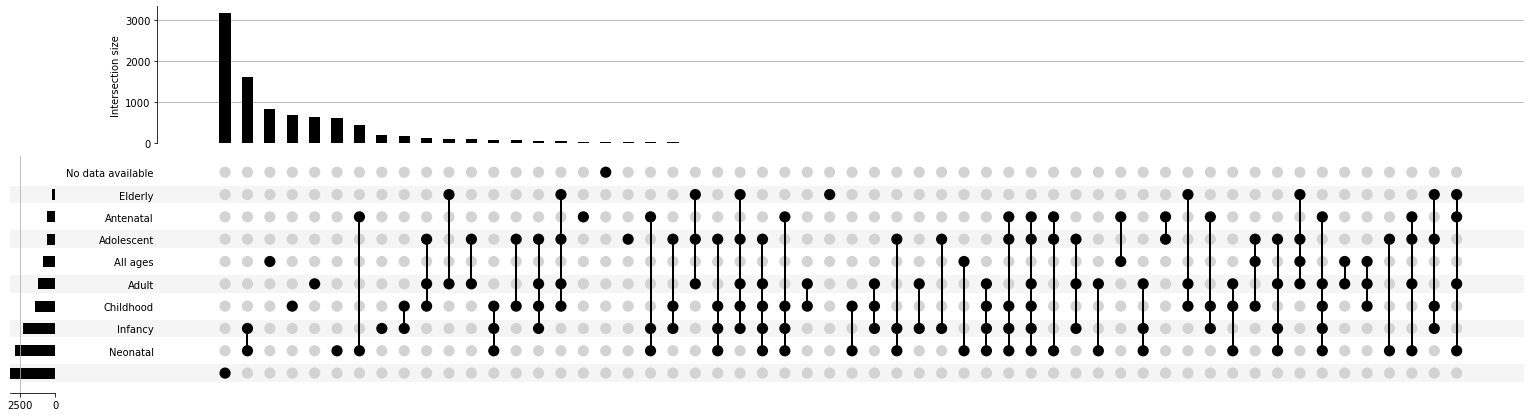

In [638]:
upset_from_membs = from_memberships(age_list_of_lists)
plot_upset(upset_from_membs,
          sort_by="cardinality")
pyplot.show()

In [639]:
nat_hist_df = nat_hist_df.query("Disorder_Type != 'Category'")

In [640]:
print("Unique diseases w/ Natural History: ", len(set(nat_hist_df.OrphaNumber)))

Unique diseases w/ Natural History:  7577


## "Linearization" (Categorization)

In [641]:
tree = ET.parse(str(ORPHANET_RAW_PATH / 'linearization_of_disorders_en_product7.xml'))
root = tree.getroot()
disorderlist_linear = root[1]


linear_list = []
linear_list_cat = []
debug_disorder = None
for disorder in disorderlist_linear:
    disorder_orphan = disorder.find("OrphaNumber").text
    disorder_name = disorder.find("Name").text
    for child in disorder.find("DisorderDisorderAssociationList"):
        disorder1 = child.find("Disorder1")
        if "cycle" in disorder1.attrib:
            disorder1_orphan = disorder_orphan
            disorder1_name = disorder_name
        else:
            disorder1_orphan = disorder1.find("OrphaNumber").text
            disorder1_name = disorder1.find("Name").text
        disorder2 = child.find("Disorder2")
        if "cycle" in disorder2.attrib:
            disorder2_orphan = disorder_orphan
            disorder2_name = disorder_name
        else:
            disorder2_orphan = disorder2.find("OrphaNumber").text
            disorder2_name = disorder2.find("Name").text
        association_type = child.find("DisorderDisorderAssociationType").find("Name").text
        linear_list.append(OrderedDict([
            ("OrphaNumber1", disorder1_orphan),
            ("OrphaNumber2", disorder2_orphan),
            ("Disorder_Name1", disorder1_name),
            ("Disorder_Name2", disorder2_name),
            ("Assocation_Type", association_type)
            ]))
        linear_list_cat.append(OrderedDict([
            ("OrphaNumber", disorder2_orphan),
            ("Disorder_Name", disorder2_name),
            ("Category", disorder1_name),
            ]))
        
linear_df = pd.DataFrame(linear_list)

linear_cat_df = pd.DataFrame(linear_list_cat).drop_duplicates()
linear_cat_df.head(10)

,OrphaNumber,Disorder_Name,Category
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Rare bone disease
1,58,Alexander disease,Rare neurologic disease
2,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",Rare bone disease
3,61,Alpha-mannosidosis,Rare inborn errors of metabolism
4,166029,"Multiple epiphyseal dysplasia, with severe pro...",Rare bone disease
5,166038,"Metaphyseal chondrodysplasia, Kaitila type",Rare bone disease
6,93,Aspartylglucosaminuria,Rare inborn errors of metabolism
7,166035,Brachydactyly-short stature-retinitis pigmento...,Rare bone disease
8,585,Multiple sulfatase deficiency,Rare inborn errors of metabolism
9,118,Beta-mannosidosis,Rare inborn errors of metabolism


In [642]:
print("Unique diseases w/ Linearization: ", len(set(linear_cat_df.OrphaNumber)))

Unique diseases w/ Linearization:  7139


In [643]:
linear_cat_df.Category.value_counts()

Rare developmental defect during embryogenesis          2256
Rare neurologic disease                                 1140
Rare neoplastic disease                                  546
Rare inborn errors of metabolism                         512
Rare skin disease                                        437
Rare bone disease                                        385
Rare ophthalmic disorder                                 251
Rare endocrine disease                                   238
Rare hematologic disease                                 206
Rare systemic or rheumatologic disease                   192
Rare infectious disease                                  176
Rare immune disease                                      176
Rare renal disease                                       135
Rare gastroenterologic disease                            87
Rare respiratory disease                                  75
Rare hepatic disease                                      68
Rare otorhinolaryngologi

## Cross-Mapping

In [644]:
tree = ET.parse(str(ORPHANET_RAW_PATH / 'rare_disease_crossref_en_product1.xml'))
root = tree.getroot()
disorderlist_cross = root[1]

In [645]:

rel_list = []
for disorder in disorderlist_cross:
    disorder_orphan = disorder.find("OrphaNumber").text
    disorder_name = disorder.find("Name").text
    disorder_synonyms = "|".join([x.text
                                  for x in disorder.find("SynonymList")])
    for child in disorder.find("ExternalReferenceList"):
        external_source = child.find("Source").text
        external_id = child.find("Reference").text
        external_mapping_rel = child.find("DisorderMappingRelation").find("Name").text
        external_mapping_status = child.find("DisorderMappingValidationStatus").find("Name").text
        rel_list.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name),
            ("External_Source", external_source),
            ("External_ID", external_id),
            ("External_Mapping_Rel", external_mapping_rel),
            ("External_Mapping_Status", external_mapping_status),
            ("Disorder_Synonyms", disorder_synonyms)
        ]))
rel_df = pd.DataFrame(rel_list)
rel_df.head(10)

,OrphaNumber,Disorder_Name,External_Source,External_ID,External_Mapping_Rel,External_Mapping_Status,Disorder_Synonyms
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",ICD-10,Q77.3,NTBT (narrower term maps to a broader term),Validated,Multiple epiphyseal dysplasia-macrocephaly-dis...
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",OMIM,607131,E (exact mapping (the terms and the concepts a...,Validated,Multiple epiphyseal dysplasia-macrocephaly-dis...
2,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",UMLS,C1846722,E (exact mapping (the terms and the concepts a...,Validated,Multiple epiphyseal dysplasia-macrocephaly-dis...
3,58,Alexander disease,OMIM,203450,E (exact mapping (the terms and the concepts a...,Validated,AxD
4,58,Alexander disease,MeSH,D038261,E (exact mapping (the terms and the concepts a...,Validated,AxD
5,58,Alexander disease,UMLS,C0270726,E (exact mapping (the terms and the concepts a...,Validated,AxD
6,58,Alexander disease,ICD-10,E75.2,NTBT (narrower term maps to a broader term),Validated,AxD
7,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",ICD-10,Q77.3,NTBT (narrower term maps to a broader term),Validated,
8,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",UMLS,C1836307,E (exact mapping (the terms and the concepts a...,Validated,
9,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",OMIM,609325,E (exact mapping (the terms and the concepts a...,Validated,


In [646]:
print("Unique diseases w/ External Mappings: ", len(set(rel_df.OrphaNumber)))

Unique diseases w/ External Mappings:  7875


In [647]:
rel_df.External_Source.value_counts().sum()

24123

In [648]:
rel_df.External_Mapping_Rel.value_counts()

E (exact mapping (the terms and the concepts are equivalent))                                                         12768
NTBT (narrower term maps to a broader term)                                                                            6934
BTNT (broader term maps to a narrower term)                                                                            4223
ND (not yet decided/unable to decide)                                                                                   196
NTBT/E (narrower term maps to a broader term because of an exact mapping with a synonym in the target terminology)        2
Name: External_Mapping_Rel, dtype: int64

In [649]:
rel_df.External_Mapping_Status.value_counts()
rel_df = rel_df.query("External_Mapping_Status == 'Validated'")

## Epi Files

## Explore diseases missing phenotypes or genes

In [650]:
orphas_w_hpo_not_gene = [orpha for orpha in set(linear_cat_df.OrphaNumber.values) if orpha in disease_hpo_df.OrphaNumber.values and orpha not in disorder_gene_df_causal.OrphaNumber.values]
orphas_w_gene_not_hpo = [orpha for orpha in set(linear_cat_df.OrphaNumber.values) if orpha in disorder_gene_df_causal.OrphaNumber.values and orpha not in disease_hpo_df.OrphaNumber.values]


In [651]:
nat_hist_df.loc[nat_hist_df.Disorder_Name.str.contains('Alexander', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
1,58,Alexander disease
4626,363722,Alexander disease type II
4627,363717,Alexander disease type I


In [652]:
disease_hpo_df.loc[disease_hpo_df.Disorder_Name.str.contains('Pelizaeus-Merzbacher', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
12340,702,Pelizaeus-Merzbacher disease


In [653]:
disorder_gene_df_causal.loc[disorder_gene_df_causal.Disorder_Name.str.contains('Pelizaeus-Merzbacher', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
2784,280293,Pelizaeus-Merzbacher-like disease due to AIMP1...
2785,280288,Pelizaeus-Merzbacher-like disease due to HSPD1...
2831,280210,"Pelizaeus-Merzbacher disease, connatal form"
2832,280219,"Pelizaeus-Merzbacher disease, classic form"
2865,280282,Pelizaeus-Merzbacher-like disease due to GJC2 ...
2868,280224,"Pelizaeus-Merzbacher disease, transitional form"
2870,280229,Pelizaeus-Merzbacher disease in female carriers


In [654]:
nat_hist_df.query("OrphaNumber in @orphas_w_gene_not_hpo").head()

,OrphaNumber,Disorder_Name,Onset_Infant,Onset_Child,Onset_Adolescent,Onset_Adult,Onset_Elderly,Disorder_Type,Average_Age_Onset,Average_Age_Death,Inheritence_Types
10,166068,Pontocerebellar hypoplasia type 5,True,False,False,False,False,Malformation syndrome,Infancy|Neonatal,early childhood,Autosomal recessive
13,166078,Von Willebrand disease type 1,True,True,True,True,True,Clinical subtype,All ages,,Autosomal dominant
14,166073,Pontocerebellar hypoplasia type 6,True,False,False,False,False,Malformation syndrome,Infancy|Neonatal,early childhood,Autosomal recessive
16,166084,Von Willebrand disease type 2A,False,False,False,False,False,Clinical subtype,,,Autosomal dominant|Autosomal recessive
20,166090,Von Willebrand disease type 2M,False,False,False,False,False,Clinical subtype,,,Autosomal dominant


In [655]:
nat_hist_df.loc[nat_hist_df.Disorder_Name.str.contains('Pontocerebellar', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
10,166068,Pontocerebellar hypoplasia type 5
12,166063,Pontocerebellar hypoplasia type 4
14,166073,Pontocerebellar hypoplasia type 6
2566,2524,Pontocerebellar hypoplasia type 2
3574,2254,Pontocerebellar hypoplasia type 1
4371,324569,Pontocerebellar hypoplasia type 8
4579,369920,Pontocerebellar hypoplasia type 9
5033,284339,Pontocerebellar hypoplasia type 7
5645,411493,Pontocerebellar hypoplasia type 10
8159,97249,Pontocerebellar hypoplasia type 3


In [656]:
disease_hpo_df.loc[disease_hpo_df.Disorder_Name.str.contains('Pontocerebellar', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
262,166063,Pontocerebellar hypoplasia type 4
54219,284339,Pontocerebellar hypoplasia type 7
57134,411493,Pontocerebellar hypoplasia type 10


In [657]:
disorder_gene_df_causal.loc[disorder_gene_df_causal.Disorder_Name.str.contains('Pontocerebellar hypoplasia', regex=False)]\
[["OrphaNumber", "Disorder_Name"]].drop_duplicates()

,OrphaNumber,Disorder_Name
5,166068,Pontocerebellar hypoplasia type 5
6,166063,Pontocerebellar hypoplasia type 4
8,166073,Pontocerebellar hypoplasia type 6
2430,2524,Pontocerebellar hypoplasia type 2
3127,2254,Pontocerebellar hypoplasia type 1
3782,324569,Pontocerebellar hypoplasia type 8
3934,369920,Pontocerebellar hypoplasia type 9
4260,284339,Pontocerebellar hypoplasia type 7
4646,411493,Pontocerebellar hypoplasia type 10
6654,97249,Pontocerebellar hypoplasia type 3


### Import OWL Files

In [658]:
import networkx
import obonet
ordo = obonet.read_obo(str(config.ORPHANET_PATH / 'ordo'/ 'ORDO_en_2.9.obo') )

In [659]:
ordo.nodes['Orphanet:522508']

{'name': 'Rare genetic ophthalmic disorder with cortical involvement',
 'is_a': ['Orphanet:183616', 'Orphanet:377794'],
 'property_value': ['notation ORPHA:522508 xsd:string']}

In [660]:
orphas_w_hpo_not_gene_w_prefix = ["Orphanet:" + idx for idx in orphas_w_hpo_not_gene]
orphas_w_gene_not_hpo_w_prefix = ["Orphanet:" + idx for idx in orphas_w_gene_not_hpo]

In [661]:


is_a_list = []
ordo_keys = list(ordo.nodes.keys())

for idx in orphas_w_hpo_not_gene:
    idx_w_prefix = "Orphanet:" + idx
    if idx_w_prefix in ordo_keys:
        for x in ordo.nodes[idx_w_prefix]['is_a']:
            is_a_list.append(OrderedDict([
                ("OrphaNumber", idx),
                ("OrphaNumber_Ordo", idx_w_prefix),
                ("OrphaName", ordo.nodes[idx_w_prefix]['name']),
                ("is_a_id", x),
                ("is_a_name", ordo.nodes[x]['name'])
            ]))
    else:
        is_a_list.append(OrderedDict([
                ("OrphaNumber", idx),
                ("OrphaName", "N/A"),
                ("is_a_id", "N/A"),
                ("is_a_name", "N/A")
            ]))
        
orphas_w_hpo_not_gene_is_a_df = pd.DataFrame(is_a_list)
orphas_w_hpo_not_gene_is_a_df.head(10)

,OrphaNumber,OrphaNumber_Ordo,OrphaName,is_a_id,is_a_name
0,2271,Orphanet:2271,Congenital ichthyosis-microcephalus-tetraplegi...,Orphanet:377788,disease
1,139411,Orphanet:139411,Carney triad,Orphanet:377788,disease
2,1397,Orphanet:1397,Hydrocephaly-cerebellar agenesis syndrome,Orphanet:377789,malformation syndrome
3,261330,Orphanet:261330,Distal 22q11.2 microdeletion syndrome,Orphanet:377789,malformation syndrome
4,3216,Orphanet:3216,Conductive deafness-malformed external ear syn...,Orphanet:377789,malformation syndrome
5,217346,Orphanet:217346,19q13.11 microdeletion syndrome,Orphanet:377789,malformation syndrome
6,618,Orphanet:618,Familial melanoma,Orphanet:377788,disease
7,1457,Orphanet:1457,Aorta coarctation,Orphanet:377791,morphological anomaly
8,3035,Orphanet:3035,Growth delay-hydrocephaly-lung hypoplasia synd...,Orphanet:377789,malformation syndrome
9,700,Orphanet:700,Alopecia totalis,Orphanet:377788,disease


In [662]:
orphas_w_hpo_not_gene_is_a_df.is_a_name.value_counts()

malformation syndrome                                                            793
disease                                                                          788
morphological anomaly                                                             76
clinical subtype                                                                  47
group of disorders                                                                17
clinical syndrome                                                                 16
etiological subtype                                                               10
obsolete class                                                                     8
N/A                                                                                6
Atypical progressive supranuclear palsy syndrome                                   4
particular clinical situation in a disease or syndrome                             4
histopathological subtype                                        

In [663]:


is_a_list = []
ordo_keys = list(ordo.nodes.keys())

for idx in orphas_w_gene_not_hpo:
    idx_w_prefix = "Orphanet:" + idx
    if idx_w_prefix in ordo_keys:
        for x in ordo.nodes[idx_w_prefix]['is_a']:
            is_a_list.append(OrderedDict([
                ("OrphaNumber", idx),
                ("OrphaNumber_Ordo", idx_w_prefix),
                ("OrphaName", ordo.nodes[idx_w_prefix]['name']),
                ("is_a_id", x),
                ("is_a_name", ordo.nodes[x]['name'])
            ]))
    else:
        is_a_list.append(OrderedDict([
                ("OrphaNumber", idx),
                ("OrphaName", "N/A"),
                ("is_a_id", "N/A"),
                ("is_a_name", "N/A")
            ]))
        
orphas_w_gene_not_hpo_is_a_df = pd.DataFrame(is_a_list)
orphas_w_gene_not_hpo_is_a_df.head(10)

,OrphaNumber,OrphaNumber_Ordo,OrphaName,is_a_id,is_a_name
0,99141,Orphanet:99141,Lymphedema-posterior choanal atresia syndrome,Orphanet:377789,malformation syndrome
1,466775,Orphanet:466775,Autosomal recessive Charcot-Marie-Tooth diseas...,Orphanet:377788,disease
2,140917,Orphanet:140917,Stapes ankylosis with broad thumbs and toes,Orphanet:377789,malformation syndrome
3,199332,Orphanet:199332,Endocrine-cerebro-osteodysplasia syndrome,Orphanet:377789,malformation syndrome
4,289863,Orphanet:289863,Atypical glycine encephalopathy,Orphanet:377796,clinical subtype
5,243367,Orphanet:243367,Acute fatty liver of pregnancy,Orphanet:377788,disease
6,280224,Orphanet:280224,"Pelizaeus-Merzbacher disease, transitional form",Orphanet:377796,clinical subtype
7,436159,Orphanet:436159,Autoimmune lymphoproliferative syndrome due to...,Orphanet:377788,disease
8,251899,Orphanet:251899,Choroid plexus carcinoma,Orphanet:377788,disease
9,169802,Orphanet:169802,Severe hemophilia A,Orphanet:377796,clinical subtype


In [664]:
orphas_w_gene_not_hpo_is_a_df.is_a_name.value_counts()

disease                                        890
clinical subtype                               336
malformation syndrome                          186
etiological subtype                             87
morphological anomaly                           40
histopathological subtype                       20
biological anomaly                               6
Early-onset partial cataract                     6
Von Willebrand disease type 2                    4
obsolete class                                   4
Early-onset zonular cataract                     3
Isolated growth hormone deficiency type III      2
Prelingual non-syndromic genetic deafness        1
Name: is_a_name, dtype: int64

In [665]:
permissable_subtypes = ['clinical subtype', 'etiological subtype', 'histopathological subtype']
orphas_w_gene_not_hpo_is_a_subtypes = orphas_w_gene_not_hpo_is_a_df.query("is_a_name in @permissable_subtypes")
orphas_w_hpo_not_gene_is_a_subtypes = orphas_w_hpo_not_gene_is_a_df.query("is_a_name in @permissable_subtypes")

In [666]:
disease_hpo_df_w_prefix = ["Orphanet:" + idx for idx in disease_hpo_df.OrphaNumber.unique()]
disorder_gene_df_causal_w_prefix = ["Orphanet:" + idx for idx in disorder_gene_df_causal.OrphaNumber.unique()]

### Grab parent's hpos or genes

In [667]:
res_list = [disorder_gene_df_causal]
for orph in orphas_w_hpo_not_gene_is_a_subtypes.OrphaNumber_Ordo.values:
    for rel in ordo.nodes[orph]['relationship']:
        sourc, targ = rel.split(" ")
        if sourc == 'BFO:0000050':
            if targ in disorder_gene_df_causal_w_prefix:
                orph_num = orph.split(":")[1]
                targ_num = targ.split(":")[1]
                orph_name = linear_cat_df.query("OrphaNumber == @orph_num").Disorder_Name.values[0]
                res_list += [disorder_gene_df_causal.query("OrphaNumber == @targ_num")\
                    .assign(OrphaNumber=orph_num)\
                    .assign(Disorder_Name=orph_name)]
disorder_gene_df_causal_expanded = pd.concat(res_list)

In [668]:
len(disorder_gene_df_causal.OrphaNumber.unique()), len(disorder_gene_df_causal_expanded.OrphaNumber.unique()), disorder_gene_df_causal.shape, disorder_gene_df_causal_expanded.shape

(3410, 3414, (6126, 7), (6130, 7))

In [669]:
res_list = [disease_hpo_df]
for orph in orphas_w_gene_not_hpo_is_a_subtypes.OrphaNumber_Ordo.values:
    if "relationship" in ordo.nodes[orph]:
        for rel in ordo.nodes[orph]['relationship']:
            sourc, targ = rel.split(" ")
            if sourc == 'BFO:0000050':
                if targ in disease_hpo_df_w_prefix:
                    orph_num = orph.split(":")[1]
                    targ_num = targ.split(":")[1]
                    orph_name = linear_cat_df.query("OrphaNumber == @orph_num").Disorder_Name.values[0]
                    res_list += [disease_hpo_df.query("OrphaNumber == @targ_num")\
                        .assign(OrphaNumber=orph_num)\
                        .assign(Disorder_Name=orph_name)]
disease_hpo_df_expanded = pd.concat(res_list)

In [670]:
len(disease_hpo_df.OrphaNumber.unique()), len(disease_hpo_df_expanded.OrphaNumber.unique()), disease_hpo_df.shape, disease_hpo_df_expanded.shape

(3702, 3998, (83565, 5), (91143, 5))

# Joining and Filtering

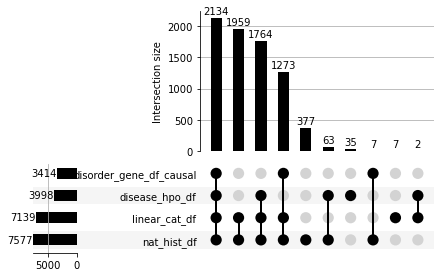

In [672]:
file_memberships = {"disease_hpo_df":set(disease_hpo_df_expanded.OrphaNumber.values),
    "disorder_gene_df_causal":set(disorder_gene_df_causal_expanded.OrphaNumber.values),
    #"disorder_gene_df_all":set(disorder_gene_df.OrphaNumber.values),
    "nat_hist_df":set(nat_hist_df.OrphaNumber.values),
    "linear_cat_df":set(linear_cat_df.OrphaNumber.values)
    #"rel_df":set(rel_df.OrphaNumber.values)
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

In [673]:
disorder_annotations_merged = disorder_gene_df_causal_expanded.set_index(['OrphaNumber','Disorder_Name']).\
    join(nat_hist_df.set_index(['OrphaNumber','Disorder_Name'])).\
    join(linear_cat_df.set_index(['OrphaNumber','Disorder_Name']))
disorder_annotations_merged.head()

Gene_Symbol  \
OrphaNumber Disorder_Name                                     
100         Ataxia-telangiectasia                       ATM   
100006      ABeta amyloidosis, Dutch type               APP   
100008      ACys amyloidosis                           CST3   
100031      Hypoplastic amelogenesis imperfecta        ACP4   
            Hypoplastic amelogenesis imperfecta        RELT   

                                                                                  Association_Type  \
OrphaNumber Disorder_Name                                                                            
100         Ataxia-telangiectasia                          Disease-causing germline mutation(s) in   
100006      ABeta amyloidosis, Dutch type                  Disease-causing germline mutation(s) in   
100008      ACys amyloidosis                               Disease-causing germline mutation(s) in   
100031      Hypoplastic amelogenesis imperfecta  Disease-causing germline mutation(s) (loss of ...   
            Hypoplastic amelogenesis imperfecta  Disease-causing germline mutation(s) (loss of ...   

                                                Association_Status  \
OrphaNumber Disorder_Name                                            
100         Ataxia-telangiectasia                         Assessed   
100006      ABeta amyloidosis, Dutch type                 Assessed   
100008      ACys amyloidosis                              Assessed   
100031      Hypoplastic amelogenesis imperfecta           Assessed   
            Hypoplastic amelogenesis imperfecta           Assessed   

                                                                                     Gene_Synonyms  \
OrphaNumber Disorder_Name                                                                            
100         Ataxia-telangiectasia                TEL1|TEL1, telomere maintenance 1, homolog (S....   
100006      ABeta amyloidosis, Dutch type                                       peptidase nexin-II   
100008      ACys amyloidosis                                                                         
100031      Hypoplastic amelogenesis imperfecta                        testicular acid phosphatase   
            Hypoplastic amelogenesis imperfecta    FLJ14993|receptor expressed in lymphoid tissues   

                                                                                Gene_External_Refs  \
OrphaNumber Disorder_Name                                                                            
100         Ataxia-telangiectasia                SwissProt:Q13315|Ensembl:ENSG00000149311|Genat...   
100006      ABeta amyloidosis, Dutch type        Ensembl:ENSG00000142192|Genatlas:APP|HGNC:620|...   
100008      ACys amyloidosis                     Ensembl:ENSG00000101439|Genatlas:CST3|HGNC:247...   
100031      Hypoplastic amelogenesis imperfecta  SwissProt:Q9BZG2|OMIM:606362|HGNC:14376|Ensemb...   
            Hypoplastic amelogenesis imperfecta  HGNC:13764|Ensembl:ENSG00000054967|SwissProt:Q...   

                                                 Onset_Infant  Onset_Child  \
OrphaNumber Disorder_Name                                                    
100         Ataxia-telangiectasia                        True         True   
100006      ABeta amyloidosis, Dutch type               False        False   
100008      ACys amyloidosis                            False        False   
100031      Hypoplastic amelogenesis imperfecta         False        False   
            Hypoplastic amelogenesis imperfecta         False        False   

                                                 Onset_Adolescent  \
OrphaNumber Disorder_Name                                           
100         Ataxia-telangiectasia                           False   
100006      ABeta amyloidosis, Dutch type                   False   
100008      ACys amyloidosis                                 True   
100031      Hypoplastic amelogenesis imperfecta             False   
         

In [674]:
orphanumbers_w_phenotypes = set(disease_hpo_df_expanded.OrphaNumber.unique())

(len(set(disorder_annotations_merged.\
        index.get_level_values("OrphaNumber").values)),
 len(set(disorder_annotations_merged.query("OrphaNumber in @orphanumbers_w_phenotypes").\
        index.get_level_values("OrphaNumber").values)),
len(set(disorder_annotations_merged.query("OrphaNumber not in @orphanumbers_w_phenotypes").\
        index.get_level_values("OrphaNumber").values))
)

(3414, 2134, 1280)

In [675]:
disorder_annotations_merged = disorder_annotations_merged.reset_index()
orphanet_all_annotations_diseases_w_phenotypes = disorder_annotations_merged.query("OrphaNumber in @orphanumbers_w_phenotypes")

In [676]:
orphanet_final_disease_genes = orphanet_all_annotations_diseases_w_phenotypes[["OrphaNumber", "Disorder_Name", 'Gene_Symbol']].\
                            drop_duplicates()
orphanet_final_disease_metadata = orphanet_all_annotations_diseases_w_phenotypes[["OrphaNumber", "Disorder_Name",
                                                "Onset_Infant", "Onset_Child",
                                                "Onset_Adolescent","Onset_Adult","Onset_Elderly",
                                               "Average_Age_Onset","Average_Age_Death","Inheritence_Types","Category"]].\
                            drop_duplicates()
    
final_diseases = orphanet_final_disease_genes.OrphaNumber.unique()
orphanet_final_disease_hpo = disease_hpo_df_expanded.query("OrphaNumber in @final_diseases")

In [677]:
len(orphanet_final_disease_genes.OrphaNumber.unique()), len(orphanet_final_disease_metadata.OrphaNumber.unique()), len(orphanet_final_disease_hpo.OrphaNumber.unique())

(2134, 2134, 2134)

In [678]:
orphanet_final_disease_genes.shape, orphanet_final_disease_metadata.shape, orphanet_final_disease_hpo.shape

((4108, 3), (2134, 11), (52594, 5))

orphanet_final_disease_genes.to_csv(ORPHANET_FLAT_PATH / 'orphanet_final_disease_genes.tsv', sep="\t", index = False)
orphanet_final_disease_hpo.to_csv(ORPHANET_FLAT_PATH / 'orphanet_final_disease_hpo.tsv', sep="\t", index = False)
orphanet_final_disease_metadata.to_csv(ORPHANET_FLAT_PATH / 'orphanet_final_disease_metadata.tsv', sep="\t", index = False)

# OrphaNumber membership by timestamp for annotations

In [679]:
#orphanet_final_disease_metadata = pd.read_csv(ORPHANET_FLAT_PATH / 'orphanet_final_disease_metadata.tsv', sep="\t")

### Import 2012 crossref

In [680]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2012_06'/ "rare_disease_crossref_en_product1.xml"))
root = tree.getroot()
disorderlist_cross_2012 = root[0]


rel_list_2012 = []
for disorder in disorderlist_cross_2012:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    rel_list_2012.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name)
        ]))
rel_df_2012 = pd.DataFrame(rel_list_2012)
print(len(rel_df_2012.OrphaNumber.unique()))
#rel_df_2012.to_csv(ORPHANET_PATH / 'flat_files_2012_06'/ "orphanet_disease_crossref.tsv", index = False, sep="\t")
rel_df_2012.head()

6403


,OrphaNumber,Disorder_Name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,166032,"Multiple epiphyseal dysplasia, with miniepiphyses"
2,58,Alexander disease
3,166029,"Multiple epiphyseal dysplasia, with severe pro..."
4,61,Alpha-mannosidosis


### Import 2013_09 Crossref

In [681]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2013_09'/ "rare_disease_crossref_en_product1.xml"))
root = tree.getroot()
disorderlist_cross_2013 = root[0]

rel_list_2013 = []
for disorder in disorderlist_cross_2013:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    rel_list_2013.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name)
        ]))
rel_df_2013 = pd.DataFrame(rel_list_2013)
print(len(rel_df_2013.OrphaNumber.unique()))
rel_df_2013.head()

6771


,OrphaNumber,Disorder_Name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,166032,"Multiple epiphyseal dysplasia, with miniepiphyses"
2,58,Alexander disease
3,166029,"Multiple epiphyseal dysplasia, with severe pro..."
4,61,Alpha-mannosidosis


### Import 2014_12 Linearization

In [682]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2014_12'/ "linearization_en_product7.xml"))
root = tree.getroot()
disorderlist_cross_2014 = root[0]


rel_list_2014 = []
for disorder in disorderlist_cross_2014:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    rel_list_2014.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name)
        ]))
rel_df_2014 = pd.DataFrame(rel_list_2014)
print(len(rel_df_2014.OrphaNumber.unique()))
rel_df_2014.head()

9211


,OrphaNumber,Disorder_Name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,58,Alexander disease
2,166032,"Multiple epiphyseal dysplasia, with miniepiphyses"
3,61,Alpha-mannosidosis
4,166029,"Multiple epiphyseal dysplasia, with severe pro..."


### Import 2015 linearization

In [683]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2015_03'/ "linearization_en_product7.xml"))
root = tree.getroot()
disorderlist_cross_2015 = root[0]

rel_list_2015 = []
for disorder in disorderlist_cross_2015:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    rel_list_2015.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name)
        ]))
rel_df_2015 = pd.DataFrame(rel_list_2015)
print(len(rel_df_2015.OrphaNumber.unique()))
rel_df_2015.head()

9142


,OrphaNumber,Disorder_Name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,58,Alexander disease
2,166032,"Multiple epiphyseal dysplasia, with miniepiphyses"
3,61,Alpha-mannosidosis
4,166029,"Multiple epiphyseal dysplasia, with severe pro..."


In [684]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2016_04'/ "rare_disease_crossref_en_product1.xml"))
root = tree.getroot()
disorderlist_cross_2016 = root[0]


rel_list_2016 = []
for disorder in disorderlist_cross_2016:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    rel_list_2016.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name)
        ]))
rel_df_2016 = pd.DataFrame(rel_list_2016).drop_duplicates()
rel_df_2016.shape
print(len(rel_df_2016.OrphaNumber.unique()))
rel_df_2016.head()

9366


,OrphaNumber,Disorder_Name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type"
1,166032,"Multiple epiphyseal dysplasia, with miniepiphyses"
2,58,Alexander disease
3,166029,"Multiple epiphyseal dysplasia, with severe pro..."
4,61,Alpha-mannosidosis


### Final Disease DF: check if in 2012, 2015

In [685]:
rel_df_2012.OrphaNumber = rel_df_2012.OrphaNumber.astype(str)
rel_df_2013.OrphaNumber = rel_df_2013.OrphaNumber.astype(str)
rel_df_2014.OrphaNumber = rel_df_2014.OrphaNumber.astype(str)
rel_df_2015.OrphaNumber = rel_df_2015.OrphaNumber.astype(str)
rel_df_2016.OrphaNumber = rel_df_2016.OrphaNumber.astype(str)

orphanet_final_disease_metadata.OrphaNumber = orphanet_final_disease_metadata.OrphaNumber.astype(str)
orphanet_final_disease_metadata["In_2012"] = [x in rel_df_2012.OrphaNumber.values for x in orphanet_final_disease_metadata.OrphaNumber.values ]
orphanet_final_disease_metadata["In_2013"] = [x in rel_df_2013.OrphaNumber.values for x in orphanet_final_disease_metadata.OrphaNumber.values ]
orphanet_final_disease_metadata["In_2014"] = [x in rel_df_2014.OrphaNumber.values for x in orphanet_final_disease_metadata.OrphaNumber.values ]
orphanet_final_disease_metadata["In_2015"] = [x in rel_df_2015.OrphaNumber.values for x in orphanet_final_disease_metadata.OrphaNumber.values ]
orphanet_final_disease_metadata["In_2016"] = [x in rel_df_2016.OrphaNumber.values for x in orphanet_final_disease_metadata.OrphaNumber.values ]

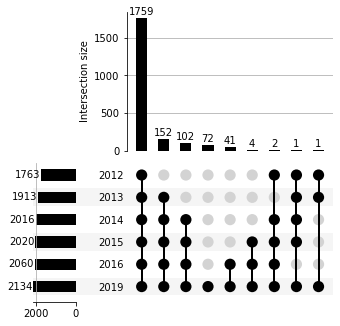

In [686]:
file_memberships = {"2012":set(orphanet_final_disease_metadata.query("In_2012").OrphaNumber.unique()),
                    "2013":set(orphanet_final_disease_metadata.query("In_2013").OrphaNumber.unique()),
                    "2014":set(orphanet_final_disease_metadata.query("In_2014").OrphaNumber.unique()),
                    "2015":set(orphanet_final_disease_metadata.query("In_2015").OrphaNumber.unique()),
                    "2016":set(orphanet_final_disease_metadata.query("In_2016").OrphaNumber.unique()),
                    "2019":set(orphanet_final_disease_metadata.OrphaNumber.unique()),
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

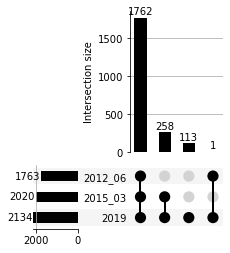

In [687]:
file_memberships = {"2012_06":set(orphanet_final_disease_metadata.query("In_2012").OrphaNumber.unique()),
                    "2015_03":set(orphanet_final_disease_metadata.query("In_2015").OrphaNumber.unique()),
                    "2019":set(orphanet_final_disease_metadata.OrphaNumber.unique()),
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

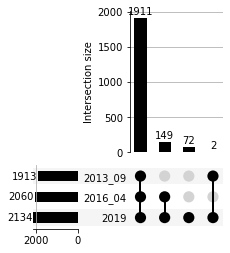

In [688]:
file_memberships = {"2013_09":set(orphanet_final_disease_metadata.query("In_2013").OrphaNumber.unique()),
                    "2016_04":set(orphanet_final_disease_metadata.query("In_2016").OrphaNumber.unique()),
                    "2019":set(orphanet_final_disease_metadata.OrphaNumber.unique()),
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

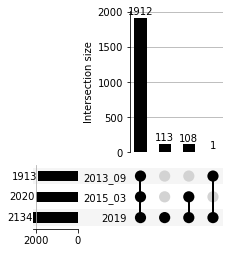

In [689]:
file_memberships = {"2013_09":set(orphanet_final_disease_metadata.query("In_2013").OrphaNumber.unique()),
                    "2015_03":set(orphanet_final_disease_metadata.query("In_2015").OrphaNumber.unique()),
                    "2019":set(orphanet_final_disease_metadata.OrphaNumber.unique()),
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

In [690]:
orphanet_final_disease_metadata.query("not In_2012").head()

,OrphaNumber,Disorder_Name,Onset_Infant,Onset_Child,Onset_Adolescent,Onset_Adult,Onset_Elderly,Average_Age_Onset,Average_Age_Death,Inheritence_Types,Category,In_2012,In_2013,In_2014,In_2015,In_2016
871,182050,MYH9-related disease,True,True,True,True,False,Adolescent|Adult|Childhood|Infancy|Neonatal,normal life expectancy,Autosomal dominant,Rare hematologic disease,False,False,True,True,True
1577,247691,Retinal vasculopathy with cerebral leukoenceph...,False,False,False,False,False,,,Autosomal dominant,Rare neurologic disease,False,False,True,True,True
2288,293284,Tetrahydrobiopterin-responsive hyperphenylalan...,True,False,False,False,False,Infancy|Neonatal,,Autosomal recessive,Rare inborn errors of metabolism,False,True,True,True,True
2291,293633,PYCR1-related De Barsy syndrome,False,False,False,False,False,,,,Rare inborn errors of metabolism,False,True,True,True,True
2294,293843,3MC syndrome,True,False,False,False,False,Infancy|Neonatal,No data available,Autosomal recessive,Rare developmental defect during embryogenesis,False,True,True,True,True


In [691]:
orphanet_final_disease_metadata.query("not In_2015").head()

,OrphaNumber,Disorder_Name,Onset_Infant,Onset_Child,Onset_Adolescent,Onset_Adult,Onset_Elderly,Average_Age_Onset,Average_Age_Death,Inheritence_Types,Category,In_2012,In_2013,In_2014,In_2015,In_2016
989,199306,Cleft lip/palate,True,False,False,False,False,Infancy|Neonatal,,Multigenic/multifactorial,Rare developmental defect during embryogenesis,True,True,False,False,False
3409,423275,Spinocerebellar ataxia type 40,False,False,False,True,False,Adult,No data available,Autosomal dominant,Rare neurologic disease,False,False,False,False,True
3410,423296,Spinocerebellar ataxia type 38,False,False,False,True,False,Adult,No data available,Autosomal dominant,Rare neurologic disease,False,False,False,False,True
3414,423461,Mucolipidosis type III alpha/beta,False,False,False,False,False,,,Autosomal recessive,Rare inborn errors of metabolism,False,False,False,False,True
3415,423470,Mucolipidosis type III gamma,False,False,False,False,False,,,Autosomal recessive,Rare inborn errors of metabolism,False,False,False,False,True


# Annotating New Diseases From Manual List

In [692]:
import numpy as np

In [693]:
disease_dates_val_test = pd.read_csv(ORPHANET_PATH / 'manual_annotations' / 'Orphanet_Diseases_Annotation-new_disease_post_2015.tsv', sep="\t", dtype=str)

In [694]:
disease_dates_val_test['Date_First_Paper'] = pd.to_datetime(disease_dates_val_test['Date_First_Paper'])

In [695]:
disease_dates_val_test.head()

,OrphaNumber,Disorder_Name,Date_First_Paper,Source
0,504476,Cerebellar ataxia with neuropathy and bilatera...,2019-08-26,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
1,521445,Microcephaly-facial dysmorphism-ocular anomali...,2018-11-01,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
2,436271,Non-progressive predominantly posterior cavita...,2018-03-26,https://www.ncbi.nlm.nih.gov/pubmed/29577824
3,529970,Male infertility due to acephalic spermatozoa,2018-03-01,https://www.omim.org/entry/617187
4,521411,Autosomal recessive axonal Charcot-Marie-Tooth...,2018-01-16,https://www.ncbi.nlm.nih.gov/pubmed/29351582


In [696]:
#orpha_ids_post_2015_03 = disease_dates_val_test.query("Date_First_Paper >= '3/1/2015'").OrphaNumber.values

#Emily is changing date to 1/2015
orpha_ids_post_2015_03 = disease_dates_val_test.query("Date_First_Paper >= '1/1/2015'").OrphaNumber.values

In [697]:
#orphas_boolean_in_val = [onum in orpha_ids_val for onum in orphanet_final_disease_metadata.OrphaNumber.values]
orphas_boolean_post_2015 = [onum in orpha_ids_post_2015_03 for onum in orphanet_final_disease_metadata.OrphaNumber.values]
orphas_boolean_pre_2015 = [(onum not in orpha_ids_post_2015_03) for onum in orphanet_final_disease_metadata.OrphaNumber.values]

In [698]:
#orphanet_final_disease_metadata["First_Published_pre_2015_03_01"] = orphas_boolean_pre_2015
orphanet_final_disease_metadata["First_Published_post_2015_03_01"] = orphas_boolean_post_2015
orphanet_final_disease_metadata.drop(columns=['In_2012', 'In_2013', 'In_2014', 'In_2015', 'In_2016'], inplace=True)

(np.sum(1-orphanet_final_disease_metadata["First_Published_post_2015_03_01"]),
 np.sum(orphanet_final_disease_metadata["First_Published_post_2015_03_01"] ))

(2069, 65)

In [699]:
orphas_in_2015 = orphanet_final_disease_metadata.query("not First_Published_post_2015_03_01").OrphaNumber.values
disease_counts = orphanet_final_disease_genes.query("OrphaNumber in @ orphas_in_2015").groupby("Gene_Symbol").count().OrphaNumber

# Annotating new genes since 2012

In [700]:
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2012_06'/ "genes_rare_diseases_en_product6.xml"))
root = tree.getroot()
genelist_2012 = root[0]


gene_list_2012 = []
for disorder in genelist_2012:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    for child_gene in disorder.find("genelist"):
        gene_symbol = child_gene.find("symbol").text
        gene_synonyms = "|".join([x.text
                                  for x in child_gene.find("synonymlist")])
        external_refs = "|".join([":".join([x.find("source").text, x.find("reference").text])
                                  for x in child_gene.find("externalreferencelist")])
        gene_list_2012.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name),
            ("Gene_Symbol", gene_symbol),
            ("Gene_Synonyms", gene_synonyms),
            ("Gene_External_Refs", external_refs)
        ]))
gene_df_2012 = pd.DataFrame(gene_list_2012)
print(len(gene_df_2012.OrphaNumber.unique()))
#gene_df_2012.to_csv(ORPHANET_PATH / 'flat_files_2012_06'/ 'orphanet_disease_gene_all_unfiltered.tsv',
                    #sep="\t", index = False)
gene_df_2012.head()

2468


,OrphaNumber,Disorder_Name,Gene_Symbol,Gene_Synonyms,Gene_External_Refs
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",KIF7,JBTS12,ENSEMBL:ENSG00000166813|GENATLAS:KIF7|HGNC:304...
1,58,Alexander disease,GFAP,,ENSEMBL:ENSG00000131095|GENATLAS:GFAP|HGNC:423...
2,58,Alexander disease,NDUFV1,,ENSEMBL:ENSG00000167792|GENATLAS:NDUFV1|HGNC:7...
3,61,Alpha-mannosidosis,MAN2B1,LAMAN|MANB,ENSEMBL:ENSG00000104774|GENATLAS:MAN2B1|HGNC:6...
4,93,Aspartylglucosaminuria,AGA,ASRG,ENSEMBL:ENSG00000038002|GENATLAS:AGA|HGNC:318|...


In [701]:
import xml.etree.ElementTree as ET
tree = ET.parse(str(ORPHANET_PATH / 'raw_files_2016_12'/ "genes_rare_diseases_en_product6.xml"))
root = tree.getroot()
genelist_2016 = root[0]

import pandas as pd
from collections import OrderedDict
gene_list_2016 = []
for disorder in genelist_2016:
    disorder_orphan = disorder.find("orphanumber").text
    disorder_name = disorder.find("name").text
    for child in disorder.find("disordergeneassociationlist"):
        child_gene = child.find("gene")
        gene_symbol = child_gene.find("symbol").text
        gene_synonyms = "|".join([x.text
                                  for x in child_gene.find("synonymlist")])
        external_refs = "|".join([":".join([x.find("source").text, x.find("reference").text])
                              for x in child_gene.find("externalreferencelist")])
        association_type = child.find("disordergeneassociationtype").find("name").text
        association_status = child.find("disordergeneassociationstatus").find("name").text
        gene_list_2016.append(OrderedDict([
            ("OrphaNumber", disorder_orphan),
            ("Disorder_Name", disorder_name),
            ("Gene_Symbol", gene_symbol),
            ("Association_Type", association_type),
            ("Gene_Synonyms", gene_synonyms),
            ("Gene_External_Refs", external_refs)
        ]))
gene_df_2016 = pd.DataFrame(gene_list_2016)
print(len(gene_df_2016.OrphaNumber.unique()))
#gene_df_2016.to_csv(ORPHANET_PATH / 'flat_files_2016_12'/ 'orphanet_disease_gene_all_unfiltered.tsv',
#                    sep="\t", index = False)

# causal_assocation_types = ["Disease-causing germline mutation(s) in",
#                            "Disease-causing germline mutation(s) (loss of function) in",
#                            "Disease-causing germline mutation(s) (gain of function) in",
#                            "Disease-causing somatic mutation(s) in"
#                           ]
# gene_df_2016 = gene_df_2016.query("Association_Type in @causal_assocation_types")
# gene_df_2016.to_csv(ORPHANET_PATH / 'flat_files_2016_12'/ 'orphanet_disease_gene_causal.tsv',
#                     sep="\t", index = False)

gene_df_2016.head()

3520


,OrphaNumber,Disorder_Name,Gene_Symbol,Association_Type,Gene_Synonyms,Gene_External_Refs
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",KIF7,Disease-causing germline mutation(s) in,JBTS12,Ensembl:ENSG00000166813|Genatlas:KIF7|HGNC:304...
1,93,Aspartylglucosaminuria,AGA,Disease-causing germline mutation(s) in,ASRG|N(4)-(beta-N-acetylglucosaminyl)-L-aspara...,Reactome:P20933|Ensembl:ENSG00000038002|Genatl...
2,585,Multiple sulfatase deficiency,SUMF1,Disease-causing germline mutation(s) in,FGE|UNQ3037,Ensembl:ENSG00000144455|Genatlas:SUMF1|HGNC:20...
3,118,Beta-mannosidosis,MANBA,Disease-causing germline mutation(s) in,beta-mannosidase A,Reactome:O00462|Genatlas:MANBA|HGNC:6831|OMIM:...
4,166068,Pontocerebellar hypoplasia type 5,TSEN54,Disease-causing germline mutation(s) in,SEN54|SEN54L,Ensembl:ENSG00000182173|Genatlas:TSEN54|HGNC:2...


In [702]:
gene_df_2015 = pd.read_csv('/mnt/udn_data/orphanet/flat_files_2015_01/hpoa_orpha_gene_disease.tsv',
                           delimiter='\t')
gene_df_2015['OrphaNumber'] = [x.split(":")[1] for x in gene_df_2015.OrphaNumber.values]


In [703]:
# TEST CODE
# gene_df_2015.loc[gene_df_2015['OrphaNumber'] == '504476']
# gene_df_2016.loc[gene_df_2016['OrphaNumber'] == '504476']
# gene_df_2012.loc[gene_df_2012['OrphaNumber'] == '504476']
# orphanet_final_disease_genes.loc[orphanet_final_disease_genes['OrphaNumber'] == '504476']


In [704]:
d_g_2019_all = list(zip(orphanet_final_disease_genes.OrphaNumber.values,
                        orphanet_final_disease_genes.Gene_Symbol.values))
d_g_2016_all = list(zip(gene_df_2016.OrphaNumber.values,
                        gene_df_2016.Gene_Symbol.values))
d_g_2015_all = list(zip(gene_df_2015.OrphaNumber.values,
                        gene_df_2015.Gene_Symbol.values))
d_g_2012_all = list(zip(gene_df_2012.OrphaNumber.values,
                        gene_df_2012.Gene_Symbol.values))
orphanet_final_disease_genes['DG_Association_In_Orpha_2012_06'] = [(d_g in d_g_2012_all) for d_g in d_g_2019_all ]
orphanet_final_disease_genes['DG_Association_In_Orpha_2015_01'] = [(d_g in d_g_2015_all) for d_g in d_g_2019_all ]
orphanet_final_disease_genes['DG_Association_In_Orpha_2016_12'] = [(d_g in d_g_2016_all) for d_g in d_g_2019_all ]

In [705]:
orphanet_final_disease_genes.head()

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Association_In_Orpha_2012_06,DG_Association_In_Orpha_2015_01,DG_Association_In_Orpha_2016_12
0,100,Ataxia-telangiectasia,ATM,True,True,True
1,100006,"ABeta amyloidosis, Dutch type",APP,False,True,True
2,100008,ACys amyloidosis,CST3,False,True,True
24,100050,Hereditary angioedema type 1,SERPING1,True,True,True
27,100069,Semantic dementia,PSEN1,False,True,True


In [706]:
#TEST CODE
orphanet_final_disease_genes.loc[orphanet_final_disease_genes['OrphaNumber'] == '504476']

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Association_In_Orpha_2012_06,DG_Association_In_Orpha_2015_01,DG_Association_In_Orpha_2016_12
3945,504476,Cerebellar ataxia with neuropathy and bilatera...,RFC1,False,False,False


In [707]:
orphanet_final_disease_genes.apply(lambda row: (row["OrphaNumber"], row["Gene_Symbol"]), axis=1).values

array([('100', 'ATM'), ('100006', 'APP'), ('100008', 'CST3'), ...,
       ('99961', 'ABCB11'), ('99966', 'SMARCB1'), ('99989', 'KCNJ11')],
      dtype=object)

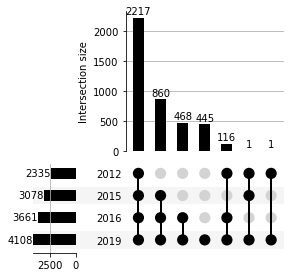

In [708]:
file_memberships = {"2019":set(orphanet_final_disease_genes.apply(lambda row: (row["OrphaNumber"], row["Gene_Symbol"]), axis=1) ),
                    "2016":set(orphanet_final_disease_genes.query("DG_Association_In_Orpha_2016_12").apply(lambda row: (row["OrphaNumber"], row["Gene_Symbol"]), axis=1) ),
                    "2015":set(orphanet_final_disease_genes.query("DG_Association_In_Orpha_2015_01").apply(lambda row: (row["OrphaNumber"], row["Gene_Symbol"]), axis=1) ),
                    "2012":set(orphanet_final_disease_genes.query("DG_Association_In_Orpha_2012_06").apply(lambda row: (row["OrphaNumber"], row["Gene_Symbol"]), axis=1) )
                    
    }
upset_from_contents = from_contents(file_memberships)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

In [709]:
d_g_2016_in_2019 = [x for x in d_g_2016_all if x in d_g_2019_all]
d_g_2015_in_2019 = [x for x in d_g_2015_all if x in d_g_2019_all]
d_g_2012_in_2019 = [x for x in d_g_2012_all if x in d_g_2019_all]

In [710]:
d_g_newBtwn15and16 = list(set(d_g_2016_in_2019).difference(set(d_g_2015_in_2019)).difference(set(d_g_2012_in_2019)))
len(d_g_newBtwn15and16)

468

In [711]:
gene_counts_2019 = orphanet_final_disease_genes.groupby("OrphaNumber").count().Gene_Symbol
assert(sum(orphanet_final_disease_metadata.OrphaNumber.values != gene_counts_2019.index) == 0)
orphanet_final_disease_metadata['N_Genes'] = gene_counts_2019.values

## New Gene, Known Disease

### Manual Gene annotations

In [712]:
new_genes_known_diseases_dates_val_test = pd.read_csv(ORPHANET_PATH / 'manual_annotations' / 'Orphanet_Genes_Annotation-NG_KG_post_2015.tsv', sep="\t", dtype=str)

curated_new_genes_delete = list(map(tuple, new_genes_known_diseases_dates_val_test.query('Date_First_Paper == "DELETE"')[['OrphaNumber','Gene_Symbol']].values.tolist()))
new_genes_known_diseases_dates_val_test = new_genes_known_diseases_dates_val_test.query('Date_First_Paper != "DELETE"')

new_genes_known_diseases_dates_val_test['Date_First_Paper'] = pd.to_datetime(new_genes_known_diseases_dates_val_test['Date_First_Paper'], errors = 'coerce')
new_genes_known_diseases_dates_val_test.head()

,OrphaNumber,Disorder_Name,Gene_Symbol,Date_First_Paper,Source,Notes,Annotator
3,93110,Posterior urethral valve,BNC2,2019-05-02,https://www.ncbi.nlm.nih.gov/pubmed/31051115,NaN,Michelle
4,2662,Keipert syndrome,GPC4,2019-04-11,https://www.ncbi.nlm.nih.gov/pubmed/30982611,New Orphanet Number 301026 (Moved as of June 2...,Michelle
5,2754,Orofaciodigital syndrome type 6,FAM149B1,2019-04-04,https://www.sciencedirect.com/science/article/...,NaN,Emily
6,29072,Hereditary pheochromocytoma-paraganglioma,DLST,2019-03-28,https://www.ncbi.nlm.nih.gov/pubmed/30929736,NaN,Michelle
7,178469,Autosomal dominant non-syndromic intellectual ...,BRSK2,2019-03-14,https://www.ncbi.nlm.nih.gov/pubmed/30879638,NaN,Sam


In [713]:
# TEST CODE
new_genes_known_diseases_dates_val_test.loc[new_genes_known_diseases_dates_val_test['OrphaNumber'] == '504476']

,OrphaNumber,Disorder_Name,Gene_Symbol,Date_First_Paper,Source,Notes,Annotator


In [714]:
# curated_new_genes = list(map(tuple, new_genes_known_diseases_dates_val_test.query("Date_First_Paper >= '3/1/2015'")[['OrphaNumber','Gene_Symbol']].values.tolist()))
# curated_old_genes = list(map(tuple, new_genes_known_diseases_dates_val_test.query("Date_First_Paper < '3/1/2015'")[['OrphaNumber','Gene_Symbol']].values.tolist()))
# Emily added to change cut-off to 1/2015 
curated_new_genes = list(map(tuple, new_genes_known_diseases_dates_val_test.query("Date_First_Paper >= '1/1/2015'")[['OrphaNumber','Gene_Symbol']].values.tolist()))
curated_old_genes = list(map(tuple, new_genes_known_diseases_dates_val_test.query("Date_First_Paper < '1/1/2015'")[['OrphaNumber','Gene_Symbol']].values.tolist()))


final_dis_gene_edges = list(map(tuple, orphanet_final_disease_genes[['OrphaNumber','Gene_Symbol']].values.tolist()))

def computeDateRange(tup):
    if tup in curated_new_genes:
        return "post_2015_03_01"
    elif tup in curated_old_genes:
        return "pre_2015_03_01"
    elif tup in curated_new_genes_delete:
        return "DELETE"
    else:
        return None
    
curated_date_ranges = [computeDateRange(tup) for tup in final_dis_gene_edges]

orphanet_final_disease_genes["Manual_Annotation_Date_Range"] = curated_date_ranges
orphanet_final_disease_genes = orphanet_final_disease_genes.query("Manual_Annotation_Date_Range != 'DELETE'")
orphanet_final_disease_genes.Manual_Annotation_Date_Range.value_counts()

post_2015_03_01    431
pre_2015_03_01     274
Name: Manual_Annotation_Date_Range, dtype: int64

In [715]:
#TEST CODE
orphanet_final_disease_genes.loc[orphanet_final_disease_genes['OrphaNumber'] == '504476']

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Association_In_Orpha_2012_06,DG_Association_In_Orpha_2015_01,DG_Association_In_Orpha_2016_12,Manual_Annotation_Date_Range
3945,504476,Cerebellar ataxia with neuropathy and bilatera...,RFC1,False,False,False,None


In [716]:
orphanet_final_disease_genes.loc[(orphanet_final_disease_genes.Manual_Annotation_Date_Range.values != None)].head()

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Association_In_Orpha_2012_06,DG_Association_In_Orpha_2015_01,DG_Association_In_Orpha_2016_12,Manual_Annotation_Date_Range
31,100973,FRAXE intellectual disability,FMR3,False,False,True,pre_2015_03_01
38,100989,Autosomal dominant spastic paraplegia type 8,WASHC5,False,False,True,pre_2015_03_01
48,1010,Autosomal dominant palmoplantar keratoderma an...,GJA1,False,False,True,pre_2015_03_01
61,101016,Romano-Ward syndrome,TRDN,False,False,False,post_2015_03_01
73,101016,Romano-Ward syndrome,CALM1,False,False,True,pre_2015_03_01


# Create Gene Meta-Data File

In [717]:
#orphanet_final_gene_metadata['Gene_In_Any_Orpha_Disease_2012_06'] = [gene in gene_df_2012.Gene_Symbol.values for gene in orphanet_final_gene_metadata.Gene_Symbol.values]
#orphanet_final_gene_metadata['Gene_In_Any_Orpha_Disease_2016_12'] = [gene in gene_df_2016.Gene_Symbol.values for gene in orphanet_final_gene_metadata.Gene_Symbol.values]
orphanet_final_gene_metadata['Gene_In_Any_Orpha_Disease_2015_03'] = [(gene in gene_df_2015.Gene_Symbol.values) or (gene in gene_df_2012.Gene_Symbol.values) for gene in orphanet_final_gene_metadata.Gene_Symbol.values]

# Save

In [608]:
#Emily added to change date from 3/2015 to 1/2015 to be consistent with D-G
orphanet_final_disease_metadata = orphanet_final_disease_metadata.rename(columns={'First_Published_post_2015_03_01':'First_Published_post_2015_01'})



In [718]:
# All of the manually annotated pre_2015_03_01 originally had DG_Association_In_Orpha_2015_01=False. We need to override this. 
print(orphanet_final_disease_genes.groupby(['Manual_Annotation_Date_Range']).count()['OrphaNumber'])
print(orphanet_final_disease_genes.groupby(['DG_Association_In_Orpha_2015_01']).count()['OrphaNumber'])

print(orphanet_final_disease_genes.loc[orphanet_final_disease_genes['Manual_Annotation_Date_Range'] == 'post_2015_03_01', 'DG_Association_In_Orpha_2015_01'].unique())
print(orphanet_final_disease_genes.loc[orphanet_final_disease_genes['Manual_Annotation_Date_Range'] == 'pre_2015_03_01', 'DG_Association_In_Orpha_2015_01'].unique())

Manual_Annotation_Date_Range
post_2015_03_01    431
pre_2015_03_01     274
Name: OrphaNumber, dtype: int64
DG_Association_In_Orpha_2015_01
False    1027
True     3078
Name: OrphaNumber, dtype: int64
[False]
[False]


In [719]:
# create column DG_Assoc_First_Published_Post_2015_01
# which is a function of both the DG_Association_In_Orpha_2015_01 & Manual Annotation columns

orphanet_final_disease_genes['DG_Assoc_First_Published_Post_2015_01'] = ~orphanet_final_disease_genes['DG_Association_In_Orpha_2015_01']


orphanet_final_disease_genes.loc[orphanet_final_disease_genes['Manual_Annotation_Date_Range'] == 'post_2015_03_01', 'DG_Assoc_First_Published_Post_2015_01'] = True 
orphanet_final_disease_genes.loc[orphanet_final_disease_genes['Manual_Annotation_Date_Range'] == 'pre_2015_03_01', 'DG_Assoc_First_Published_Post_2015_01'] = False 


In [720]:
orphanet_final_disease_genes.loc [orphanet_final_disease_genes['OrphaNumber'] == '99852']

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Association_In_Orpha_2012_06,DG_Association_In_Orpha_2015_01,DG_Association_In_Orpha_2016_12,Manual_Annotation_Date_Range,DG_Assoc_First_Published_Post_2015_01
6068,99852,Ravine syndrome,SLC7A2-IT1,False,False,True,pre_2015_03_01,False


In [721]:
# orphanet_final_disease_genes['DG_Assoc_First_Published_Post_2015_03_01'] = orphanet_final_disease_genes['Manual_Annotation_Date_Range'] == 'post_2015_03_01'
orphanet_final_disease_genes.drop(columns=["DG_Association_In_Orpha_2012_06","DG_Association_In_Orpha_2015_01", "DG_Association_In_Orpha_2016_12", 'Manual_Annotation_Date_Range'], inplace=True)
orphanet_final_disease_genes.to_csv(ORPHANET_FLAT_PATH / 'orphanet_final_disease_genes_2015_bugfix.tsv', sep="\t", index = False)
orphanet_final_disease_genes.head()

,OrphaNumber,Disorder_Name,Gene_Symbol,DG_Assoc_First_Published_Post_2015_01
0,100,Ataxia-telangiectasia,ATM,False
1,100006,"ABeta amyloidosis, Dutch type",APP,False
2,100008,ACys amyloidosis,CST3,False
24,100050,Hereditary angioedema type 1,SERPING1,False
27,100069,Semantic dementia,PSEN1,False
